<h1>Agglomerative Clustering</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
phones_df = pd.read_csv('../../preprocessing/smartphones_preprocessed.csv')

In [3]:
phones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [4]:
# Creating a map for value mapping
os_mapping = {'ios': 1, 'android': 2, 'other': 3}

# Using mapping on the 'os' column
phones_df['os'] = phones_df['os'].map(os_mapping)

In [5]:
phones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,64,6.1,60,2,1,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,128,6.1,60,2,1,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,64,6.5,60,3,1,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,64,6.1,60,2,1,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,128,6.1,60,2,1,12.0,12.0,0,2532,1170


In [6]:
# Define the desired ratio of phones in "low" and "high" bins
desired_ratio = 0.7
min_price = phones_df['price'].min()
max_price = phones_df['price'].max()

# Calculate the threshold price based on the desired ratio
threshold_price = phones_df['price'].quantile(desired_ratio)

# Define the bin edges for low and high based on the threshold
bin_edges = [min_price, threshold_price, max_price]

# Define labels for the bins
labels = ['low', 'high']

# Apply the calculated bins to the "price" column
phones_df['price_category'] = pd.cut(phones_df['price'], bins=bin_edges, labels=labels)
phones_df['price_category'].fillna('high', inplace=True)
phones_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,price_category
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,1,12.0,12.0,0,1792,828,high
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,1,12.0,12.0,0,1792,828,high
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,6.5,60,3,1,12.0,12.0,0,2688,1242,high
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,1,12.0,12.0,0,2532,1170,high
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,1,12.0,12.0,0,2532,1170,high


In [7]:
# Getting a list of the first 15 brands
top_15_brands = phones_df['brand_name'].value_counts().index[:15].tolist()

# Mapping brands according to requirements
phones_df['brand_name'] = phones_df['brand_name'].apply(lambda x: x if x in top_15_brands else 'other')

In [8]:
print("All of the brand names:\n", np.sort(phones_df['brand_name'].unique()))

All of the brand names:
 ['apple' 'google' 'honor' 'huawei' 'infinix' 'iqoo' 'motorola' 'oneplus'
 'oppo' 'other' 'poco' 'realme' 'samsung' 'tecno' 'vivo' 'xiaomi']


In [9]:
# List of brand names
brand_names = ['apple', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'motorola', 'oneplus',
               'oppo', 'other', 'poco', 'realme', 'samsung', 'tecno', 'vivo', 'xiaomi']

# Creating a map to map brands to numbers
brand_mapping = {brand: index + 1 for index, brand in enumerate(brand_names)}

# Mapping brands to numerical values
phones_df['brand_name'] = phones_df['brand_name'].map(brand_mapping)

In [10]:
phones_df.head(7)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,price_category
0,1,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,1,12.0,12.0,0,1792,828,high
1,1,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.000000,0,...,6.1,60,2,1,12.0,12.0,0,1792,828,high
2,1,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.000000,1,...,6.5,60,3,1,12.0,12.0,0,2688,1242,high
3,1,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,1,12.0,12.0,0,2532,1170,high
4,1,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,1,12.0,12.0,0,2532,1170,high
5,1,Apple iPhone 12 (256GB),67999,7.6,1,bionic,6.0,3.10,4817.748194,0,...,6.1,60,2,1,12.0,12.0,0,2532,1170,high
6,1,Apple iPhone 12 Mini,40999,7.4,1,bionic,6.0,3.10,4817.748194,0,...,5.4,60,2,1,12.0,12.0,0,2340,1080,high


In [11]:
features = [
    'brand_name', 'price', 'avg_rating', '5G_or_not', 'num_cores', 'processor_speed',
    'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity',
    'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
    'os', 'primary_camera_rear', 'primary_camera_front',
    'extended_memory_available', 'resolution_height', 'resolution_width'
]

In [12]:
X = phones_df[features]
X

,brand_name,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,1,38999,7.3,0,6.0,2.65,3110.000000,0,1.0,4,64,6.10,60,2,1,12.0,12.0,0,1792,828
1,1,46999,7.5,0,6.0,2.65,3110.000000,0,1.0,4,128,6.10,60,2,1,12.0,12.0,0,1792,828
2,1,109900,7.7,0,6.0,2.65,3500.000000,1,18.0,4,64,6.50,60,3,1,12.0,12.0,0,2688,1242
3,1,51999,7.4,1,6.0,3.10,4817.748194,0,1.0,4,64,6.10,60,2,1,12.0,12.0,0,2532,1170
4,1,55999,7.5,1,6.0,3.10,4817.748194,0,1.0,4,128,6.10,60,2,1,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,16,13999,7.5,0,8.0,2.30,5020.000000,1,18.0,4,64,6.67,60,4,2,48.0,16.0,1,2400,1080
976,16,14439,7.7,0,8.0,2.30,5020.000000,1,18.0,4,128,6.67,60,4,2,48.0,16.0,1,2400,1080
977,16,16490,8.0,0,8.0,2.30,5020.000000,1,33.0,6,64,6.67,60,4,2,64.0,32.0,1,2400,1080
978,10,19999,8.2,1,8.0,3.20,4200.000000,1,55.0,6,128,6.90,120,4,2,50.0,16.0,1,2460,1080


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X = pd.DataFrame(X, columns=features)
X

,brand_name,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,0.0,0.054911,0.448276,0.0,0.5,0.717822,0.063878,0.0,0.004167,0.176471,0.055118,0.570156,0.000000,0.333333,0.0,0.050505,0.200000,0.0,0.390476,0.175758
1,0.0,0.067285,0.517241,0.0,0.5,0.717822,0.063878,0.0,0.004167,0.176471,0.118110,0.570156,0.000000,0.333333,0.0,0.050505,0.200000,0.0,0.390476,0.175758
2,0.0,0.164580,0.586207,0.0,0.5,0.717822,0.083205,1.0,0.075000,0.176471,0.055118,0.659243,0.000000,0.666667,0.0,0.050505,0.200000,0.0,0.657143,0.384848
3,0.0,0.075019,0.482759,1.0,0.5,0.940594,0.148508,0.0,0.004167,0.176471,0.055118,0.570156,0.000000,0.333333,0.0,0.050505,0.200000,0.0,0.610714,0.348485
4,0.0,0.081206,0.517241,1.0,0.5,0.940594,0.148508,0.0,0.004167,0.176471,0.118110,0.570156,0.000000,0.333333,0.0,0.050505,0.200000,0.0,0.610714,0.348485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1.0,0.016241,0.517241,0.0,1.0,0.544554,0.158531,1.0,0.075000,0.176471,0.055118,0.697105,0.000000,1.000000,0.5,0.232323,0.266667,1.0,0.571429,0.303030
976,1.0,0.016922,0.586207,0.0,1.0,0.544554,0.158531,1.0,0.075000,0.176471,0.118110,0.697105,0.000000,1.000000,0.5,0.232323,0.266667,1.0,0.571429,0.303030
977,1.0,0.020094,0.689655,0.0,1.0,0.544554,0.158531,1.0,0.137500,0.294118,0.055118,0.697105,0.000000,1.000000,0.5,0.313131,0.533333,1.0,0.571429,0.303030
978,0.6,0.025522,0.758621,1.0,1.0,0.990099,0.117895,1.0,0.229167,0.294118,0.118110,0.748330,0.333333,1.000000,0.5,0.242424,0.266667,1.0,0.589286,0.303030


In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters=2, linkage='average', compute_distances=True)
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='average')

In [17]:
model.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
phones_df[model.labels_ == 0]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,price_category
0,1,Apple iPhone 11,38999,7.300000,0,bionic,6.000000,2.650000,3110.0,0,...,6.10,60,2,1,12.0,12.0,0,1792,828,high
1,1,Apple iPhone 11 (128GB),46999,7.500000,0,bionic,6.000000,2.650000,3110.0,0,...,6.10,60,2,1,12.0,12.0,0,1792,828,high
2,1,Apple iPhone 11 Pro Max,109900,7.700000,0,bionic,6.000000,2.650000,3500.0,1,...,6.50,60,3,1,12.0,12.0,0,2688,1242,high
24,1,Apple iPhone 14 Mini,69990,7.000000,0,bionic,7.772074,2.427217,3500.0,1,...,5.42,60,2,1,12.0,12.0,0,2340,1080,high
35,1,Apple iPhone 15,82990,7.200000,0,bionic,7.772074,2.427217,3285.0,1,...,6.06,60,2,1,50.0,13.0,0,2532,1170,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16,Xiaomi Redmi 9A Sport,6499,6.100000,0,helio,8.000000,2.000000,5000.0,0,...,6.53,60,1,2,13.0,5.0,1,1600,720,low
906,16,Xiaomi Redmi A1,6171,7.825825,0,helio,4.000000,2.000000,5000.0,1,...,6.52,60,2,2,8.0,5.0,1,1600,720,low
907,16,Xiaomi Redmi A1 Plus,7289,6.000000,0,helio,4.000000,2.000000,5000.0,1,...,6.52,60,2,2,8.0,5.0,1,1600,720,low
908,16,Xiaomi Redmi A1 Plus (3GB RAM + 32GB),8399,6.100000,0,helio,4.000000,2.000000,5000.0,1,...,6.52,60,2,2,8.0,5.0,1,1600,720,low


In [19]:
phones_df[model.labels_ == 1]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,price_category
3,1,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.1,4817.748194,0,...,6.10,60,2,1,12.0,12.0,0,2532,1170,high
4,1,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.1,4817.748194,0,...,6.10,60,2,1,12.0,12.0,0,2532,1170,high
5,1,Apple iPhone 12 (256GB),67999,7.6,1,bionic,6.0,3.1,4817.748194,0,...,6.10,60,2,1,12.0,12.0,0,2532,1170,high
6,1,Apple iPhone 12 Mini,40999,7.4,1,bionic,6.0,3.1,4817.748194,0,...,5.40,60,2,1,12.0,12.0,0,2340,1080,high
7,1,Apple iPhone 12 Mini (128GB),45999,7.5,1,bionic,6.0,3.1,4817.748194,0,...,5.40,60,2,1,12.0,12.0,0,2340,1080,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,16,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.3,5020.000000,1,...,6.67,60,4,2,48.0,16.0,1,2400,1080,low
976,16,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.3,5020.000000,1,...,6.67,60,4,2,48.0,16.0,1,2400,1080,low
977,16,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.3,5020.000000,1,...,6.67,60,4,2,64.0,32.0,1,2400,1080,low
978,10,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.2,4200.000000,1,...,6.90,120,4,2,50.0,16.0,1,2460,1080,low


In [20]:
model.children_[:,0].shape

(979,)

In [21]:
model.distances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14462313e-04,
       1.41963793e-03, 1.53286693e-03, 1.54678802e-03, 3.00076875e-03,
       4.23783546e-03, 4.23783546e-03, 4.43968379e-03, 4.76910429e-03,
       6.80741406e-03, 1.18014958e-02, 1.56522304e-02, 2.10082327e-02,
       2.73523337e-02, 3.44848240e-02, 3.44874820e-02, 3.44914305e-02,
       3.45177110e-02, 3.45180598e-02, 3.46209773e-02, 3.46803568e-02,
       3.47954453e-02, 3.49418865e-02, 3.50334339e-02, 3.50713742e-02,
       3.51580186e-02, 3.53394181e-02, 3.53424673e-02, 3.57118491e-02,
       3.57134589e-02, 3.59650330e-02, 3.70576772e-02, 3.89663597e-02,
       3.93695020e-02, 4.46857737e-02, 4.67082516e-02, 4.67127027e-02,
       4.68032787e-02, 5.23191481e-02, 5.50400584e-02, 5.88438626e-02,
       6.29978496e-02, 6.30111140e-02, 6.30348410e-02, 6.48585380e-02,
       6.50766508e-02, 6.63541817e-02, 6.64622656e-02, 6.66846084e-02,
       6.67967481e-02, 6.72630528e-02, 6.72630528e-02, 6.82071559e-02,
      

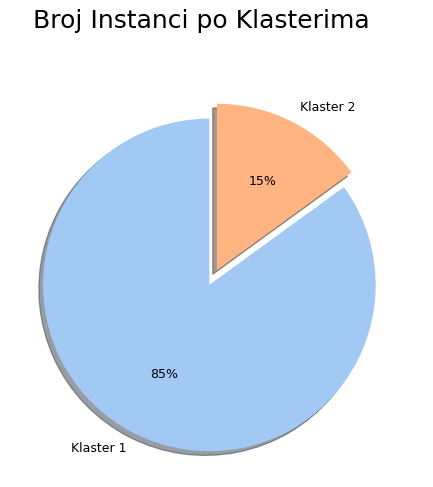

In [22]:
# Calculating the number of instances in each cluster
cluster_counts = phones_df['model'][model.labels_].value_counts()

# Creating a pie plot for the number of instances per cluster
plt.figure(figsize=(14, 6), dpi=90)
palette_color = sns.color_palette('pastel')   # Change the color palette

explode = [0.1, 0]

plt.pie(
    cluster_counts,
    labels=[f'Klaster {i}' for i in range(1, 3)],
    colors=palette_color,
    shadow=True,
    explode=explode,
    autopct='%.0f%%',
    startangle=90  # Start the angle at 90 degrees for a different look
)

plt.suptitle('Broj Instanci po Klasterima', fontsize=20)
plt.show()

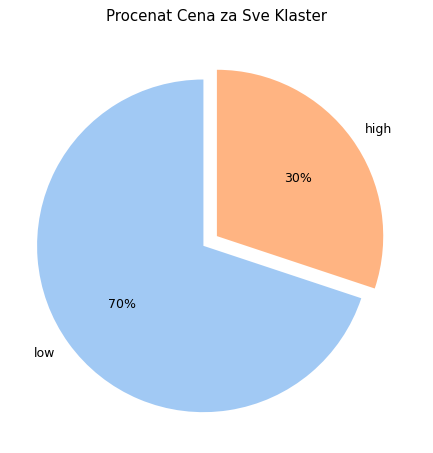

In [23]:
# Calculating the number of instances with low and high prices for all clusters
all_price_category_counts = phones_df['price_category'].value_counts()

# Creating a pie plot for the percentage of prices for all clusters
plt.figure(figsize=(8, 6), dpi=90)
palette_color = sns.color_palette('pastel')
explode = [0.1, 0]
plt.pie(
    all_price_category_counts,
    labels=all_price_category_counts.index,
    autopct='%.0f%%',
    startangle=90,
    explode=explode,
    colors=palette_color
)
plt.title('Procenat Cena za Sve Klaster')

plt.show()

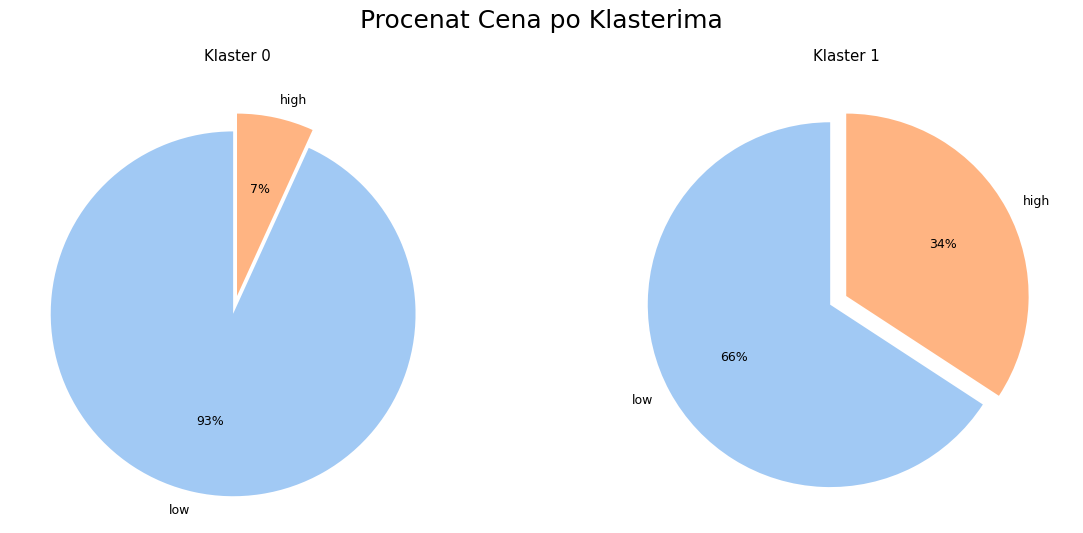

In [24]:
# Adding a cluster label column to the dataframe
phones_df['cluster'] = model.labels_

# Creating a pie plot for the percentage of prices by clusters
plt.figure(figsize=(14, 6), dpi=90)
palette_color = sns.color_palette('pastel')
explode = [0.1, 0]

# Looping through cluster labels
for cluster in phones_df['cluster'].unique():
    cluster_data = phones_df[phones_df['cluster'] == cluster]
    price_category_counts = cluster_data['price_category'].value_counts()
    
    # Creating a pie plot for the current cluster
    plt.subplot(1, len(phones_df['cluster'].unique()), cluster + 1)
    plt.pie(
        price_category_counts,
        labels=price_category_counts.index,
        autopct='%.0f%%',
        startangle=90,
        explode=explode,
        colors=palette_color
    )
    plt.title(f'Klaster {cluster}')
    
plt.suptitle('Procenat Cena po Klasterima', fontsize=20)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, model.labels_)
silhouette_avg

0.30456488536953696

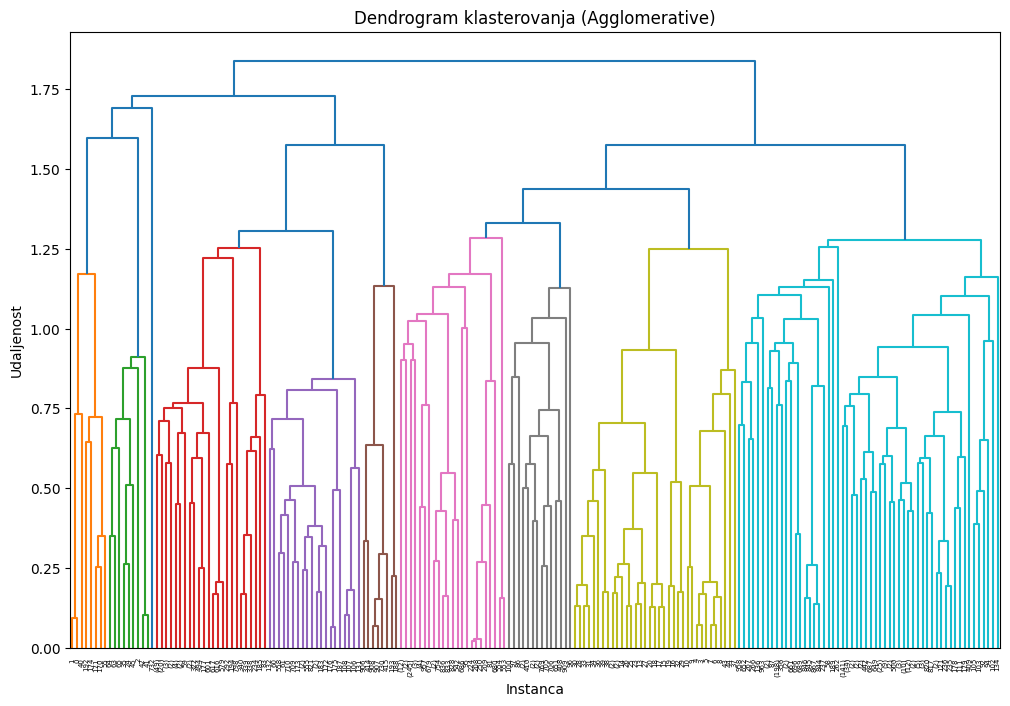

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Creating a dendrogram based on the links generated by the agglomerative algorithm
linked = linkage(X, method='average', metric='euclidean')

# Drawing a dendrogram with a limit on the number of displayed instances
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='level', p=10)  # Prikazi prvih 10 nivoa
plt.xlabel('Instanca')
plt.ylabel('Udaljenost')
plt.title('Dendrogram klasterovanja (Agglomerative)')
plt.show()

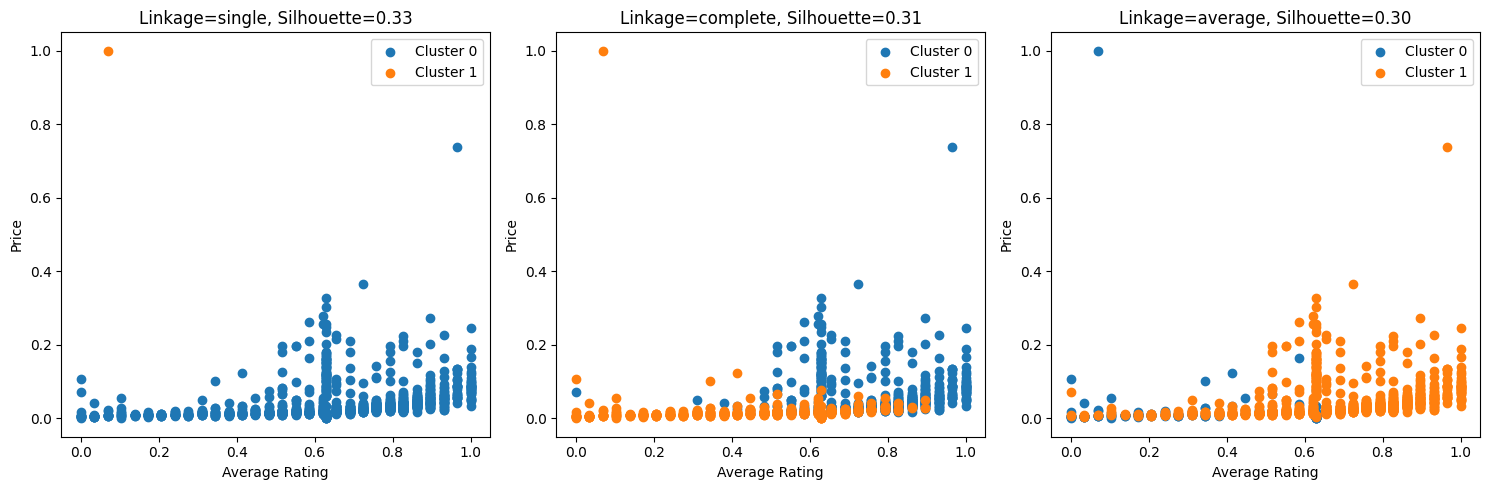

In [27]:
k = 2
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15, 5))

for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    fig.add_subplot(1, len(linkages), idx+1)
    
    for cluster_label in range(k):
        cluster_indices = np.where(model.labels_ == cluster_label)[0]
        cluster_data = X.iloc[cluster_indices]
        plt.scatter(cluster_data['avg_rating'], cluster_data['price'], label=f'Cluster {cluster_label}')
    
    plt.title(f'Linkage={linkage}, Silhouette={silhouette_score(X, model.labels_):.2f}')
    plt.xlabel('Average Rating')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# List of parameters to be tested
n_clusters_list = [2, 3, 4, 5, 6]

# Empty lists to store silhouette scores
silhouette_scores = []

for n_clusters in n_clusters_list:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='single', compute_distances=True)
    model.fit(X)
    
    # Calculating silhouette scores
    silhouette_avg = silhouette_score(X, model.labels_)
    silhouette_scores.append(silhouette_avg)

# Displaying results
for i, n_clusters in enumerate(n_clusters_list):
    print(f"Broj klastera: {n_clusters}, Silueta: {silhouette_scores[i]}")

Broj klastera: 2, Silueta: 0.3340003435848277
Broj klastera: 3, Silueta: 0.1081324576491808
Broj klastera: 4, Silueta: 0.06962755343660572
Broj klastera: 5, Silueta: 0.07713846212986981
Broj klastera: 6, Silueta: 0.01779546705553775


In [29]:
best_n_clusters = n_clusters_list[silhouette_scores.index(max(silhouette_scores))]

print(f"Najbolji broj klastera prema siluet indeksu: {best_n_clusters}")

Najbolji broj klastera prema siluet indeksu: 2


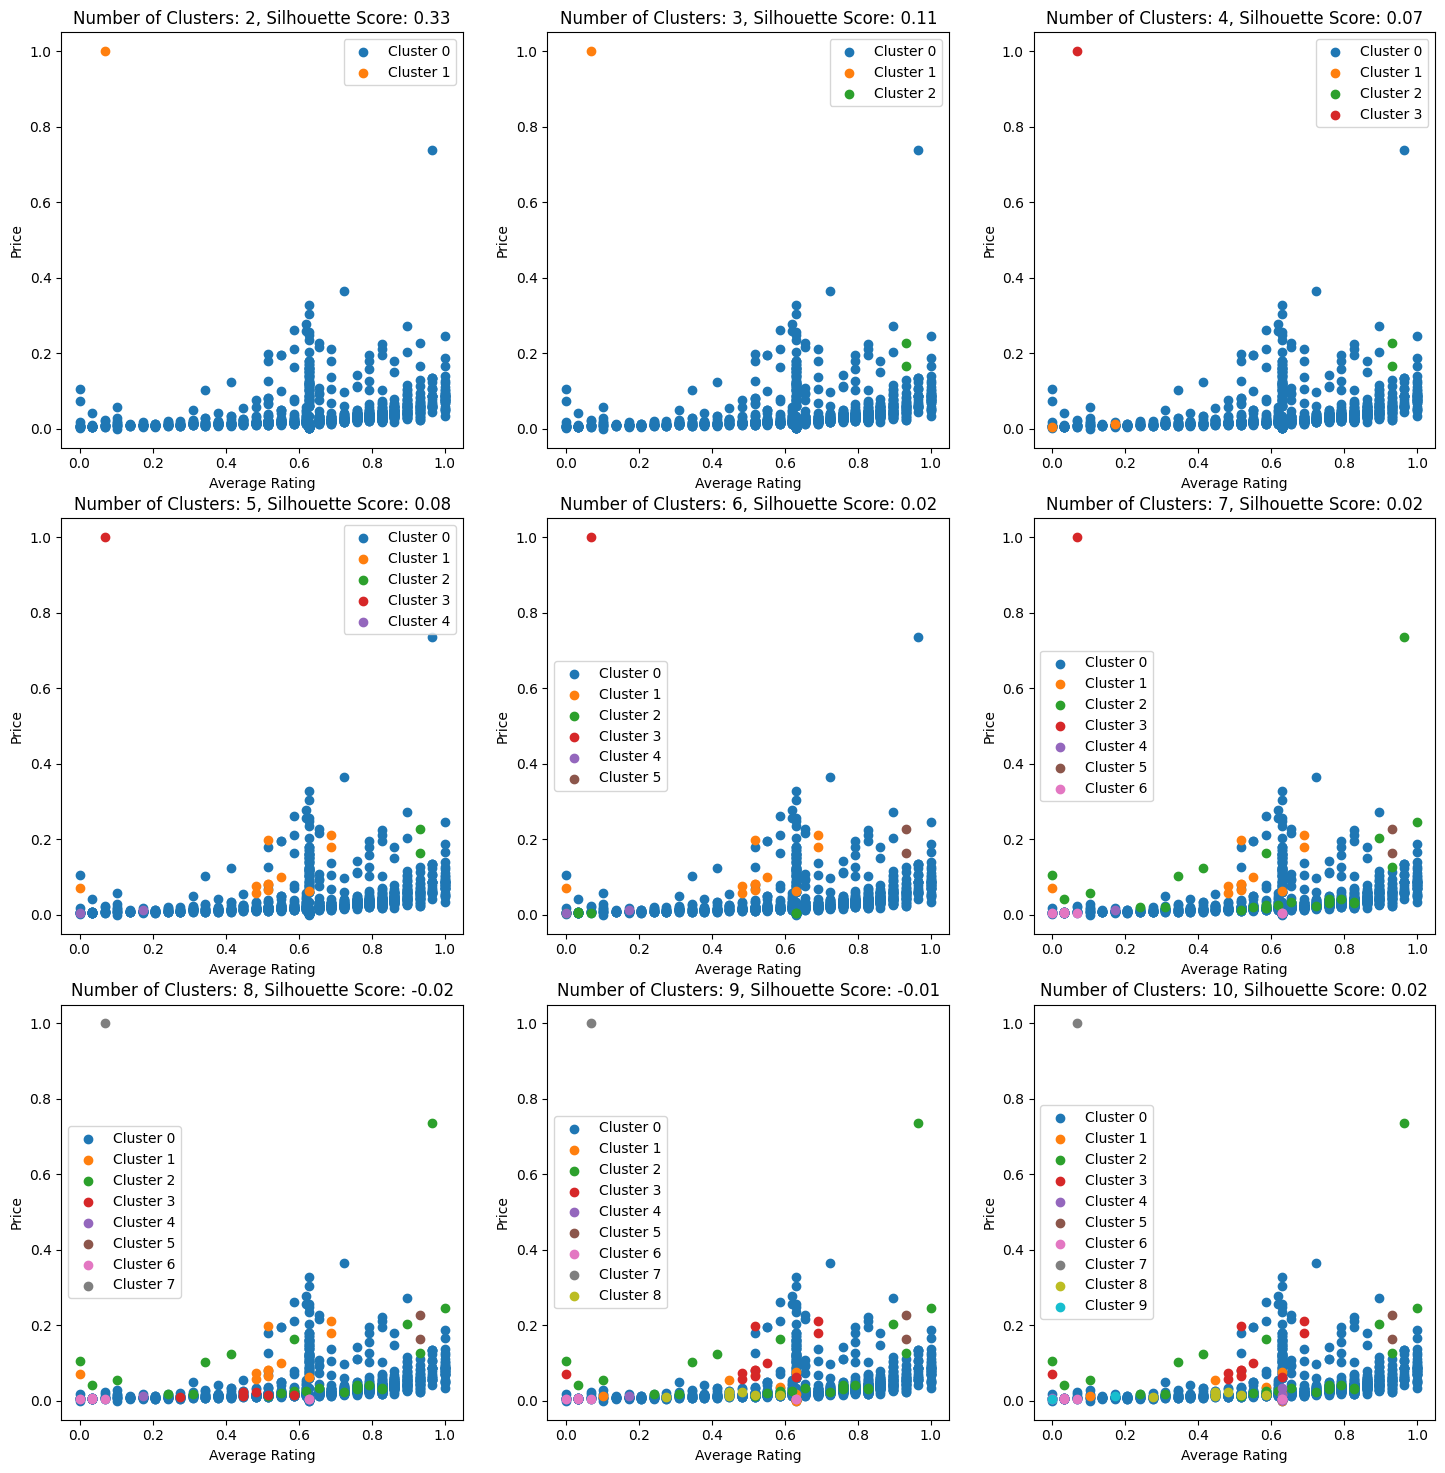

In [30]:
linkage = 'single'
sil_scores = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for k in range(2, 11):  # Promenjeno: 11 umesto num_clusters
    row = (k - 2) // 3
    col = (k - 2) % 3

    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    sil_score = silhouette_score(X, model.labels_)
    sil_scores.append(sil_score)
    
    ax = axes[row, col]
    for cluster_label in range(k):
        cluster_indices = np.where(model.labels_ == cluster_label)[0]
        cluster_data = X.iloc[cluster_indices]
        ax.scatter(cluster_data['avg_rating'], cluster_data['price'], label=f'Cluster {cluster_label}')
    
    ax.set_title(f'Number of Clusters: {k}, Silhouette Score: {sil_score:.2f}')
    ax.set_xlabel('Average Rating')
    ax.set_ylabel('Price')
    ax.legend()

plt.show()

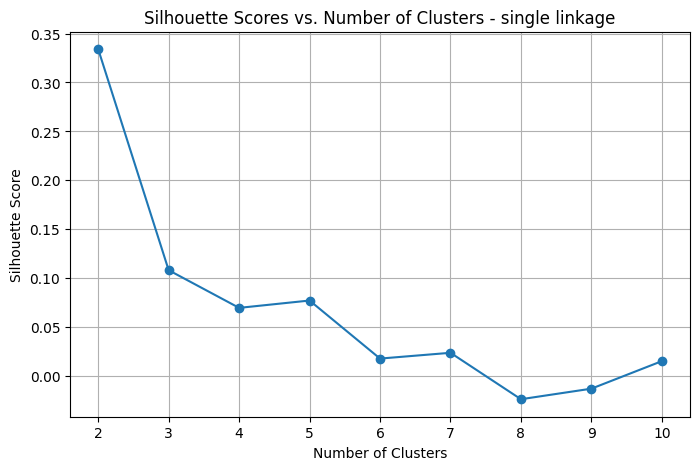

In [31]:
# Plotting Silhouette scores against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters - single linkage')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

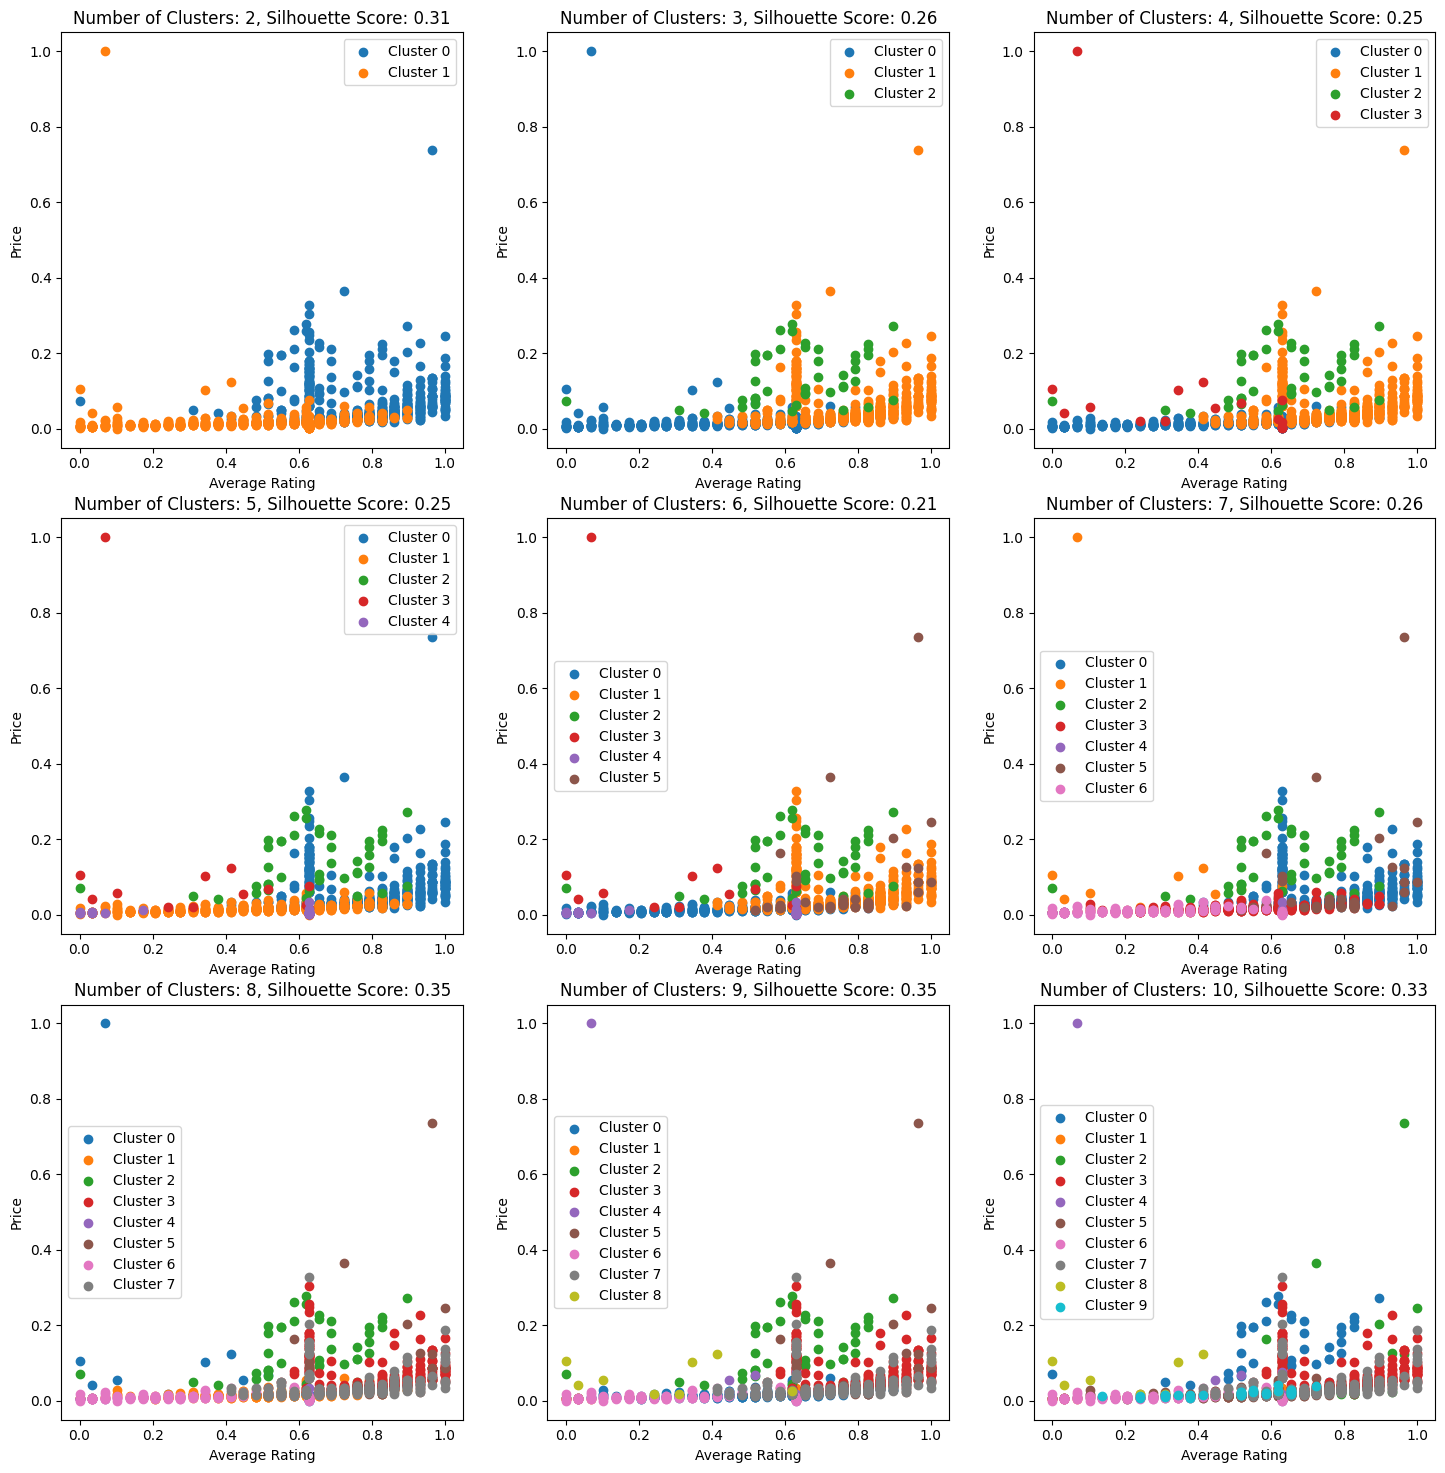

In [32]:
linkage = 'complete'
sil_scores = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for k in range(2, 11):  # Promenjeno: 11 umesto num_clusters
    row = (k - 2) // 3
    col = (k - 2) % 3

    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    sil_score = silhouette_score(X, model.labels_)
    sil_scores.append(sil_score)
    
    ax = axes[row, col]
    for cluster_label in range(k):
        cluster_indices = np.where(model.labels_ == cluster_label)[0]
        cluster_data = X.iloc[cluster_indices]
        ax.scatter(cluster_data['avg_rating'], cluster_data['price'], label=f'Cluster {cluster_label}')
    
    ax.set_title(f'Number of Clusters: {k}, Silhouette Score: {sil_score:.2f}')
    ax.set_xlabel('Average Rating')
    ax.set_ylabel('Price')
    ax.legend()

plt.show()

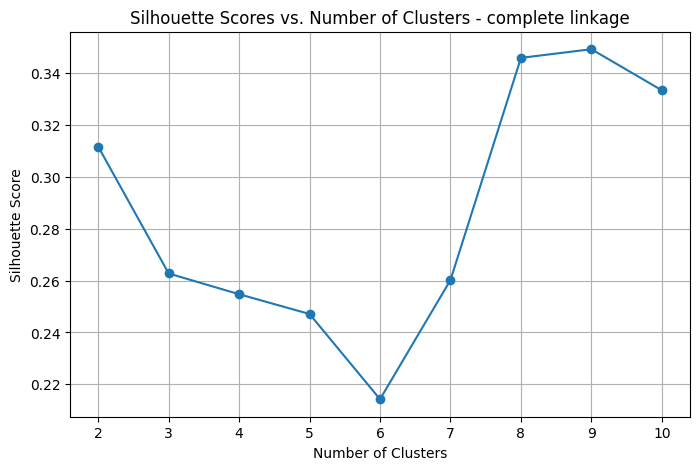

In [33]:
# Plotting Silhouette scores against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters - complete linkage')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

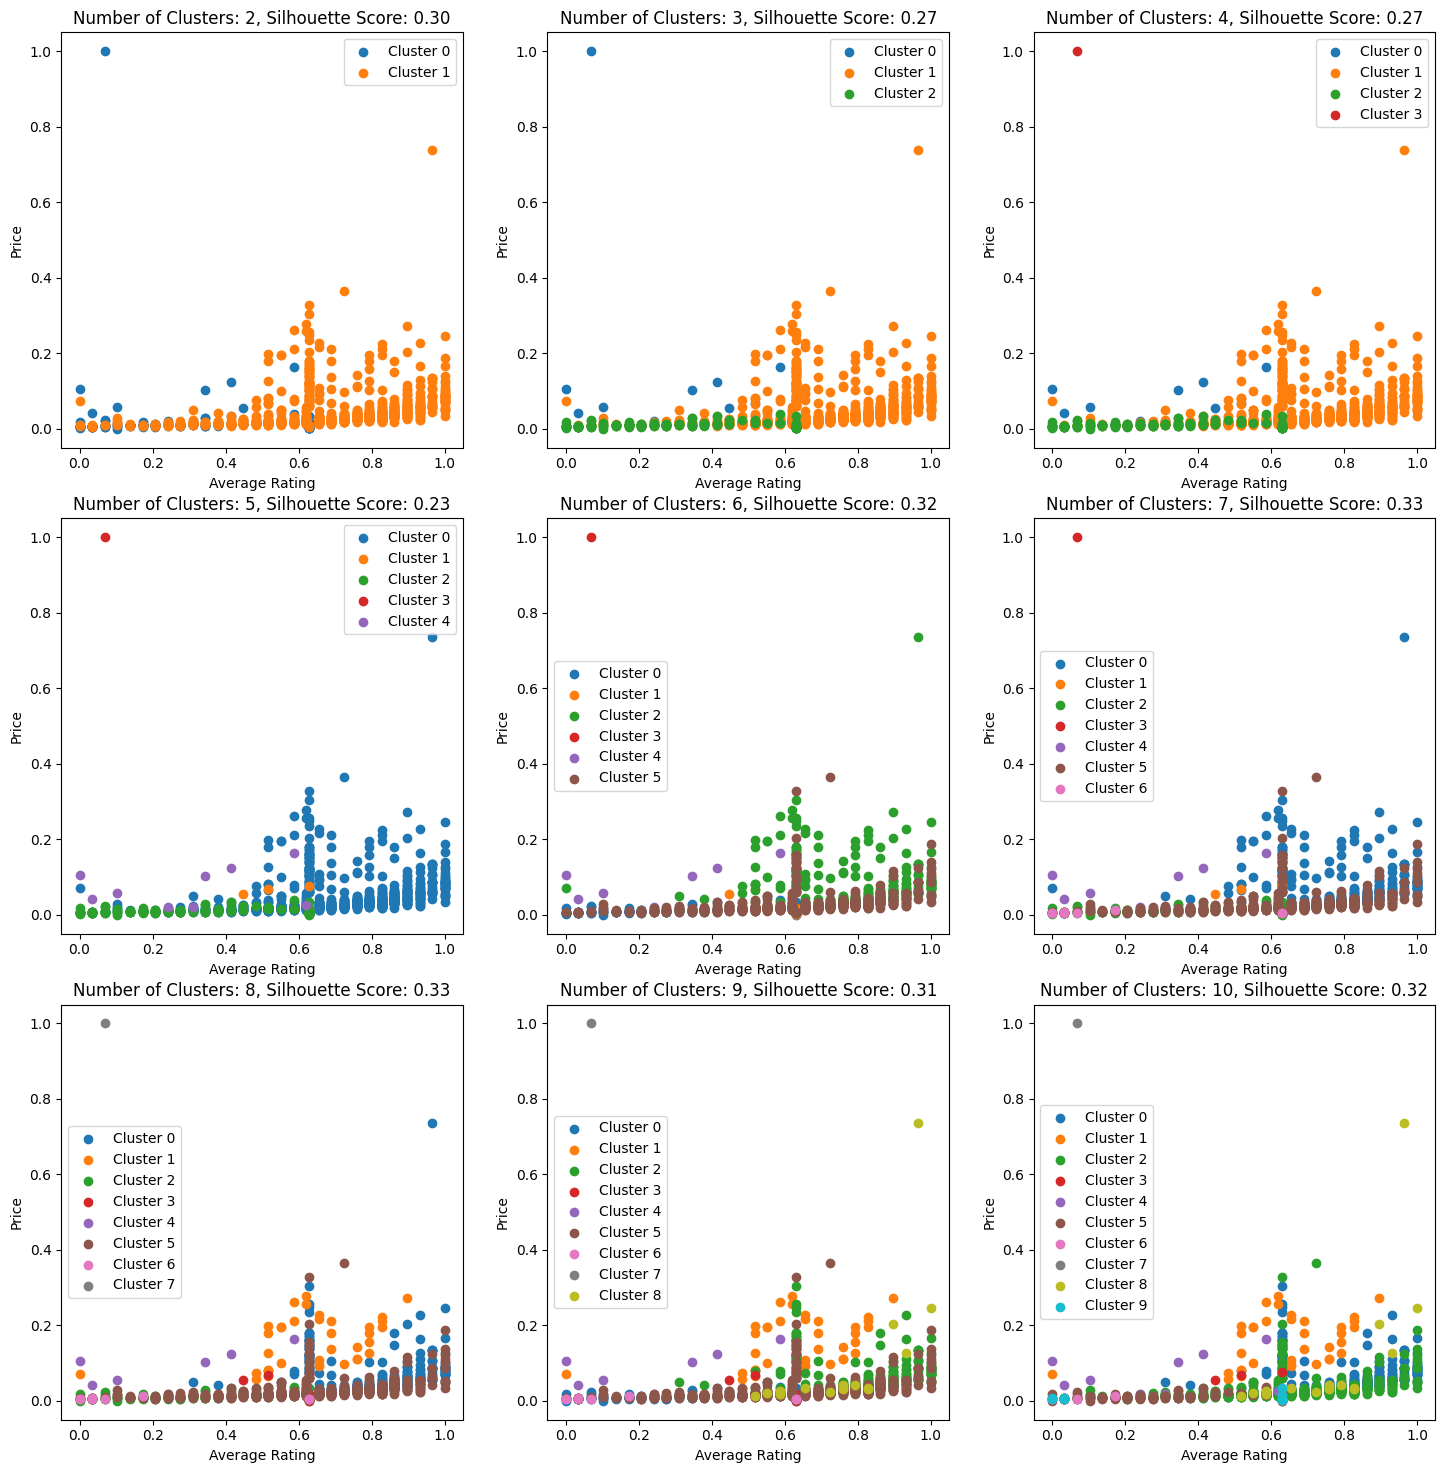

In [34]:
linkage = 'average'
sil_scores = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=3.0)

for k in range(2, 11):  # Promenjeno: 11 umesto num_clusters
    row = (k - 2) // 3
    col = (k - 2) % 3

    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    sil_score = silhouette_score(X, model.labels_)
    sil_scores.append(sil_score)
    
    ax = axes[row, col]
    for cluster_label in range(k):
        cluster_indices = np.where(model.labels_ == cluster_label)[0]
        cluster_data = X.iloc[cluster_indices]
        ax.scatter(cluster_data['avg_rating'], cluster_data['price'], label=f'Cluster {cluster_label}')
    
    ax.set_title(f'Number of Clusters: {k}, Silhouette Score: {sil_score:.2f}')
    ax.set_xlabel('Average Rating')
    ax.set_ylabel('Price')
    ax.legend()

plt.show()

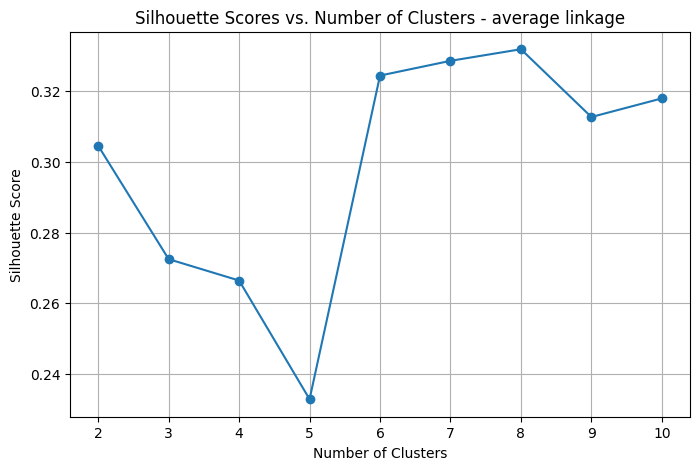

In [35]:
# Plotting Silhouette scores against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters - average linkage')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()